# Inicialización de espacio de trabajo

## 📝Importación de librerías requeridas

In [1]:
from sys import path
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

# Se genera la ruta absoluta al directorio "Comisiones"
path_package = str(Path.cwd().parent)

# Se agrega la ruta al directorio sys.path
path.append(path_package)


from algoritmos.algoritmo_ventas_mes import ventas_mes_func
from algoritmos.algoritmo_cobranza_mes import cobranza_mes_func

from descriptions.descriptions import descrip_sales_users_df, descrip_product_df, descrip_partner_df

## 🔢DataFrames a utilizar

`pos` - Líneas del Punto de Venta, tomado de `pos.order.line`

In [94]:
pos = pd.read_excel("../data/20240212/pos.xlsx", header=0)

`fac` - Líneas de Factura, tomado de `account.move.line`

In [3]:
fac = pd.read_excel("../data/20240212/fac.xlsx", header=0)

## 💱Transformación de datos para su análisis

In [10]:
# Se transforma Origen a String para poder tratar datos nulos ahora convertidos a cadena "nan"
fac["Origen"] = fac["Origen"].astype(str)

# 📊Análisis Exploratorio de datos

## 🔶Búsqueda por facturas que tienen origen en Ventas y les faltan líneas de orden vinculadas
Ejemplo, se eliminó una línea de orden ya facturada

In [76]:
# Parámetros
a = fac["Origen"].str.contains("S\d{5}") # Se buscan todas las facturas que tengan origen con S##### como S00350, por ejemplo
b = fac["Líneas de la orden de venta/Almacén"].isna() # Debe haber valores NaN en cualquier columna de líneas de orden de venta porque no hay líneas de orden de venta
c = fac["Estado"] != "cancel" # Se descartan facturas canceladas para reducir a sólo las válidas aún con anomalías
col = ["Origen", "Número", "Producto/Referencia interna", "Estado"] # Columnas a mostrar en el resultado

# Resultado
res = fac[(a) & (b)& (c)][col]
res

,Origen,Número,Producto/Referencia interna,Estado
3777,S00988,F2-VS/2024/00155,1739,posted
4184,S02636,F2-VS/2024/00139,1720,posted
4185,S02636,F2-VS/2024/00139,1739,posted


Llevar el DataFrame a Excel

In [12]:
res.to_excel("Origen en Ventas con líneas de orden faltantes.xlsx", sheet_name="Datos", index=False)

## 🔶Facturas sin origen
Generadas directamente en el folio de contabilidad

In [77]:
# Parámetros
a = fac["Origen"] == 'nan' # Origen desconocido

# Resultado
res = fac[a]

In [ ]:
# Visualizar el resultado
res

In [80]:
# Agrupar por número de factura
col = [
    "Número", # Columnas para agrupar
    "Partner" # Cliente (En ausencia de Vendedora)
]

res.groupby(col).count()

,,ID,Fecha,Precio unitario,Subtotal,Producto/Referencia interna,Producto,Cantidad,Tipo interno,Origen,Estado,...,Líneas de la orden de venta/Margen,Líneas de la orden de venta/Margen (%),Líneas de la orden de venta/Precio unitario,Líneas de la orden de venta/Producto/Referencia interna,Líneas de la orden de venta/Producto,Líneas de la orden de venta/Referencia de la orden,Líneas de la orden de venta/Subtotal,Líneas de la orden de venta/Total,Líneas de la orden de venta/Total de impuestos,Líneas de la orden de venta/Vendedor
Número,Partner,,,,,,,,,,,,,,,,,,,,,
F1-CC/2024/00759,ANGEL MALDONADO TORRES,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
F1-VS/2024/00033,CBR HOTEL OWNER,5,5,5,4,4,4,5,5,5,5,...,0,0,0,0,0,0,0,0,0,0
F1-VS/2024/00036,CBR HOTEL OWNER,4,4,4,4,3,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0
F1-VS/2024/00037,CBR HOTEL OWNER,11,11,11,11,11,11,11,11,11,11,...,0,0,0,0,0,0,0,0,0,0
F1-VS/2024/00222,SV-CB RESORT,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0
F1-VS/2024/00252,SV-CB RESORT,13,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Mostrar el DataFrame con los datos filtrados

# Función
x = res.groupby(col).count().to_dict() # Sacamos las IDs del groupby
ids = [] # Se inicializa la lista del resultado
for i in x["ID"]: # Se accede a la primera ID (Ya que se filtró primero por ID y luego por cliente, son dos valores por llave del diccionario)
    ids.append(i[0]) # Se obtiene cada ID

col =  # Se filtra por todos los folios que estén dentro de las IDs del groupby
res = fac[fac["Número"].isin(ids)]


Exportar a Excel

(Tomar en cuenta el resultado actual)

In [48]:
res.to_excel("Facturas sin origen (Generadas en Contabilidad).xlsx", sheet_name="Datos", index=False)

In [90]:
fac["Estado"].unique()

array(['posted', 'cancel'], dtype=object)

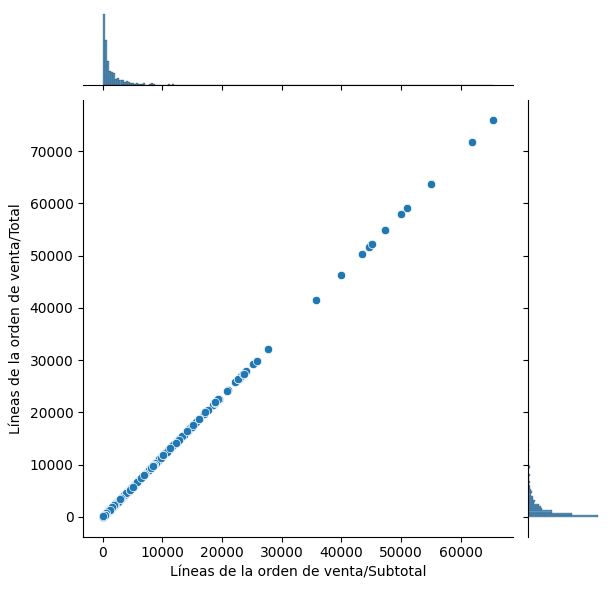

In [74]:
ce = fac[(fac["Origen"].str.contains("S\d{5}")) | (fac["Origen"] == 'nan')]

x = "Líneas de la orden de venta/Subtotal"
y = "Líneas de la orden de venta/Total"


In [93]:
col = [
    'Número',
    'Líneas de la orden de venta/Cantidad de entrega',
    'Líneas de la orden de venta/Cantidad facturada',
    'Dif en cantidades (Factura)'
]

ce["Dif en cantidades (Factura)"] = ce['Líneas de la orden de venta/Cantidad facturada'] - ce['Líneas de la orden de venta/Cantidad de entrega']
ce[~(ce["Dif en cantidades (Factura)"].isna()) & (ce["Estado"] != "cancel") & (ce["Dif en cantidades (Factura)"] != 0)].sort_values(by="Dif en cantidades (Factura)")[col]

C:\Users\GustavoCostich\AppData\Local\Temp\ipykernel_8084\2510165677.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce["Dif en cantidades (Factura)"] = ce['Líneas de la orden de venta/Cantidad facturada'] - ce['Líneas de la orden de venta/Cantidad de entrega']


,Número,Líneas de la orden de venta/Cantidad de entrega,Líneas de la orden de venta/Cantidad facturada,Dif en cantidades (Factura)
2189,F1-VS/2024/00322,150.0,142.0,-8.0
121,F1-VS/2024/00360,3.0,2.0,-1.0
4348,F2-CC/2024/01207,0.0,1.0,1.0
4347,F2-CC/2024/01207,0.0,1.0,1.0
4739,F2-CC/2024/01152,0.0,1.0,1.0
3891,F2-CC/2024/01314,0.0,1.0,1.0
3589,F1-VS/2024/00269,0.0,1.0,1.0
3572,F1-VS/2024/00275,0.0,1.0,1.0
3571,F1-VS/2024/00275,0.0,1.0,1.0
5351,F2-CC/2024/01047,0.0,1.0,1.0


In [70]:
def scatter(x, y, df):
    sns.jointplot(x=df[x], y=df[y], kind="scatter")

## Extra

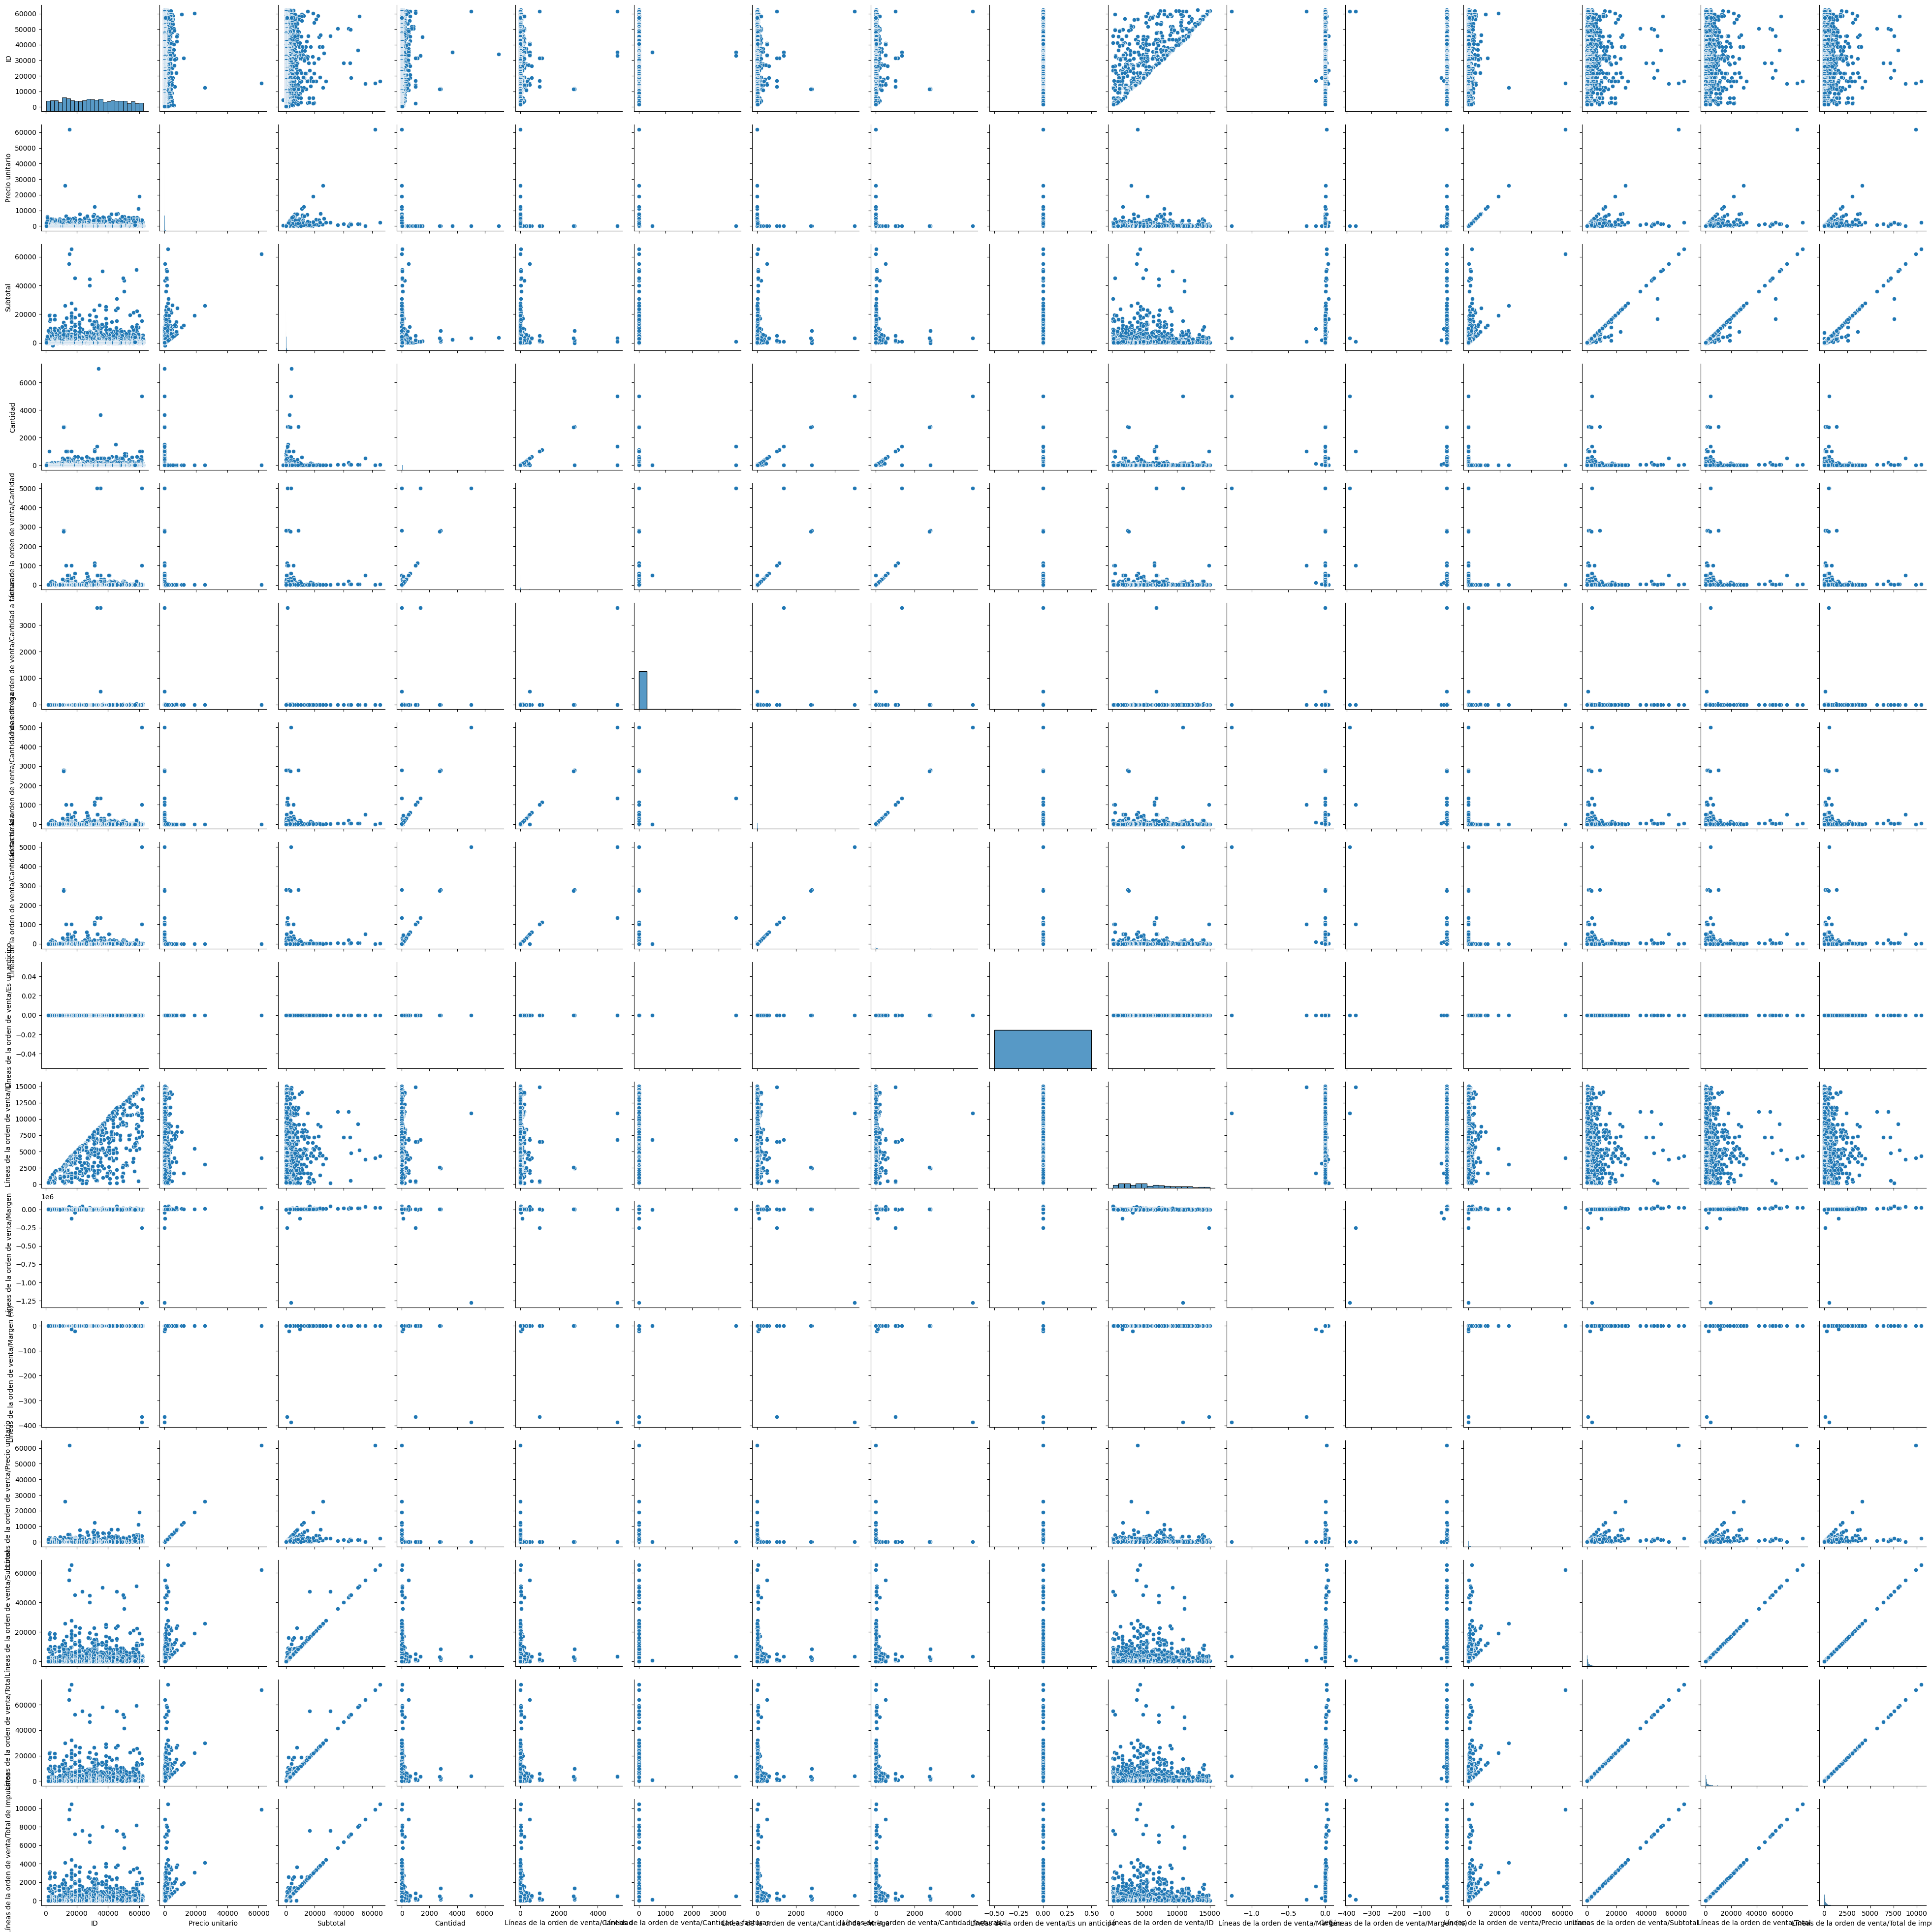

In [6]:
sns.pairplot(data= fac)
plt.show()

## Códigos de referencia

### Aquí se sacó un acumulado de las órdenes de pos donde había más de una vendedora
Código de referencia

In [7]:
pos2 = pd.DataFrame(columns=["Duplicados"])
pos2["Duplicados"] = pos["Ref. de la orden"] + pos["Fuente de la línea de orden de venta/Vendedor"]
pos2["Orden"] = pos["Ref. de la orden"]
pos2 = pos2.drop_duplicates("Duplicados")
pos3 = pos2.groupby("Orden").count()
# pos3[pos3["Duplicados"] > 1].to_excel("Vendedoras no únicas en órdenes de PdV.xlsx", sheet_name="Datos")
pos[pos["Ref. de la orden"] == "PdV SJC/1671"]

,Creado el,Ref. de la orden,Orden de ventas vinculada,Ref. de la orden/Factura,Cantidad,Descuento (%),Precio unitario,Producto,Subtotal,Subtotal sin impuestos,...,Fuente de la línea de orden de venta/Producto,Fuente de la línea de orden de venta/Referencia de la orden,Fuente de la línea de orden de venta/Subtotal,Fuente de la línea de orden de venta/Total,Fuente de la línea de orden de venta/Total de impuestos,Fuente de la línea de orden de venta/Vendedor,Ref. de la orden/Factura/Estado,Ref. de la orden/Factura/Fecha,Ref. de la orden/Factura/Número,Ref. de la orden/Factura/Tipo
7475,2024-01-25 10:02:14,PdV SJC/1671,S04387,F2-CC/2024/01644 (PdV SJC/1671),8.0,0.0,0.24,[2020] Tuerca Hexagonal #8-32 Hncz (17000/Ct) ...,2.23,1.92,...,[2020] Tuerca Hexagonal #8-32 Hncz (17000/Ct) ...,S04387,1.92,2.23,0.31,Karla Jaqueline Rivera Hernández,Publicado,2024-01-25,F2-CC/2024/01644,Factura de cliente
7476,2024-01-25 10:02:14,PdV SJC/1671,S04387,F2-CC/2024/01644 (PdV SJC/1671),8.0,0.0,0.15,"[5339] Tornillo C/Redonda 8/32""* 1"" C#90 *5339*",1.39,1.20,...,"[5339] Tornillo C/Redonda 8/32""* 1"" C#90 *5339*",S04387,1.20,1.39,0.19,Karla Jaqueline Rivera Hernández,Publicado,2024-01-25,F2-CC/2024/01644,Factura de cliente
7477,2024-01-25 10:02:14,PdV SJC/1671,S04387,F2-CC/2024/01644 (PdV SJC/1671),1.0,0.0,23.95,[58132] Cinta D/Montaje 19mmx1.5m Esp Trup#117...,27.78,23.95,...,[58132] Cinta D/Montaje 19mmx1.5m Esp Trup#117...,S04387,23.95,27.78,3.83,Karla Jaqueline Rivera Hernández,Publicado,2024-01-25,F2-CC/2024/01644,Factura de cliente
7478,2024-01-25 10:02:14,PdV SJC/1671,S04382,F2-CC/2024/01644 (PdV SJC/1671),1.0,0.0,16.49,[5717] Cinta Aislante Trup M-33 Negra #12500 *...,19.13,16.49,...,[5717] Cinta Aislante Trup M-33 Negra #12500 *...,S04382,16.49,19.13,2.64,Nadia Santos Nava,Publicado,2024-01-25,F2-CC/2024/01644,Factura de cliente
7479,2024-01-25 10:02:14,PdV SJC/1671,S04381,F2-CC/2024/01644 (PdV SJC/1671),4.0,0.0,21.01,[1865] Perico Magnetico Doble #3428 Cafe *1865*,97.49,84.04,...,[1865] Perico Magnetico Doble #3428 Cafe *1865*,S04381,84.04,97.49,13.45,Yolanda Alejandra Rodriguez González,Publicado,2024-01-25,F2-CC/2024/01644,Factura de cliente


In [95]:
pos.columns

Index(['Creado el', 'Ref. de la orden', 'Orden de ventas vinculada',
       'Ref. de la orden/Factura', 'Cantidad', 'Descuento (%)',
       'Precio unitario', 'Producto', 'Subtotal', 'Subtotal sin impuestos',
       'Cantidad reembolsada', 'Fuente de la línea de orden de venta/Almacén',
       'Fuente de la línea de orden de venta/Cantidad',
       'Fuente de la línea de orden de venta/Cantidad a facturar',
       'Fuente de la línea de orden de venta/Cantidad de entrega',
       'Fuente de la línea de orden de venta/Cantidad facturada',
       'Fuente de la línea de orden de venta/Cliente',
       'Fuente de la línea de orden de venta/Descripción',
       'Fuente de la línea de orden de venta/Es un anticipo',
       'Fuente de la línea de orden de venta/ID',
       'Fuente de la línea de orden de venta/ID.1',
       'Fuente de la línea de orden de venta/Margen',
       'Fuente de la línea de orden de venta/Margen (%)',
       'Fuente de la línea de orden de venta/Precio unitario',
   

In [96]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9727 entries, 0 to 9726
Data columns (total 35 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   Creado el                                                         9727 non-null   datetime64[ns]
 1   Ref. de la orden                                                  9727 non-null   object        
 2   Orden de ventas vinculada                                         9487 non-null   object        
 3   Ref. de la orden/Factura                                          9321 non-null   object        
 4   Cantidad                                                          9727 non-null   float64       
 5   Descuento (%)                                                     9727 non-null   float64       
 6   Precio unitario                                                   9727 n

In [97]:
pos.describe()

,Creado el,Cantidad,Descuento (%),Precio unitario,Subtotal,Subtotal sin impuestos,Cantidad reembolsada,Fuente de la línea de orden de venta/Cantidad,Fuente de la línea de orden de venta/Cantidad a facturar,Fuente de la línea de orden de venta/Cantidad de entrega,Fuente de la línea de orden de venta/Cantidad facturada,Fuente de la línea de orden de venta/Es un anticipo,Fuente de la línea de orden de venta/ID,Fuente de la línea de orden de venta/Margen,Fuente de la línea de orden de venta/Margen (%),Fuente de la línea de orden de venta/Precio unitario,Fuente de la línea de orden de venta/Subtotal,Fuente de la línea de orden de venta/Total,Fuente de la línea de orden de venta/Total de impuestos,Ref. de la orden/Factura/Fecha
count,9727,9727.000000,9727.000000,9727.000000,9727.000000,9727.000000,9727.000000,9482.000000,9482.000000,9482.000000,9482.000000,9482.0,9482.000000,9482.000000,9482.000000,9482.000000,9463.000000,9463.000000,9482.000000,9321
mean,2024-01-17 06:58:40.457283840,12.042346,3.565230,167.418493,303.320414,261.483146,0.381135,12.818256,-0.000105,12.839559,12.839348,0.0,7559.259439,84.178345,0.345128,165.364554,286.673100,332.540756,45.775746,2024-01-16 17:35:09.945284864
min,2024-01-02 08:19:45,-510.000000,0.000000,0.000000,-8960.770000,-7724.800000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.0,3.000000,-431.000000,-17.523810,0.000000,0.620000,0.720000,0.000000,2024-01-02 00:00:00
25%,2024-01-10 10:41:48,1.000000,0.000000,13.820000,44.975000,38.770000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,3777.750000,15.160000,0.333333,13.865000,43.020000,49.900000,6.880000,2024-01-10 00:00:00
50%,2024-01-17 12:21:06,2.000000,0.000000,56.780000,118.660000,102.290000,0.000000,2.000000,0.000000,2.000000,2.000000,0.0,7493.500000,36.880000,0.384548,56.830000,111.030000,128.790000,17.755000,2024-01-17 00:00:00
75%,2024-01-24 15:58:00,5.000000,0.000000,143.440000,267.985000,231.020000,0.000000,5.000000,0.000000,5.000000,5.000000,0.0,11478.750000,80.780000,0.384623,143.440000,241.800000,280.490000,38.537500,2024-01-24 00:00:00
max,2024-01-31 17:56:09,7000.000000,20.000000,7785.000000,30529.980000,26318.950000,510.000000,7000.000000,0.000000,7000.000000,7000.000000,0.0,15305.000000,6823.450000,1.000000,7785.000000,26318.950000,30529.980000,4211.030000,2024-02-01 00:00:00
std,NaN,86.167133,7.133821,469.661416,834.311207,720.055854,7.883151,86.879057,0.010270,86.906259,86.906283,0.0,4400.395816,184.855774,0.263677,460.143436,698.267828,809.990628,111.629645,NaN
